## Testing and Debugging the BPASS isochrone at 10^9 years age.
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 1 billion years age, 0.1solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or 110 (for the case of compact remnant primary from secondary star models). This is since we haven't identified neutron stars or black holes yet. Also, stars with phase of -99 do exist, and those are the secondary stars that have already merged.

## This is for tutorial as well as debugging and demonstration purposes.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.0, 0.0, 100,math.log10(1/10), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=5.00 for T= 31808 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 25854 logg=6.03
Changing to logg=5.00 for T= 29214 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 29214 logg=8.00
Changing to logg=5.00 for T= 29214 logg=8.00
Changing to logg=5.00 for T= 23510 logg=5.82
Changing to logg=5.00 for T= 19775 logg=5.37
Changing to logg=5.00 for T= 29246 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 30805 logg=6.87
Changing to logg=5.00 for T= 29367 logg=5.86
Changing to logg=5.00 for T= 21696 logg=5.45
Changing to logg=5.00 for T= 25829 logg=6.01
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 20293 logg=5.24
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 29214 logg=8.00
Changing to logg=5.00 for T= 25777 logg=5.93
Changing to logg=5.00 for T= 31822 logg=8.00
Changing t

As a sanity check, I would like to make sure thatk, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (101), and non-white dwarf compact remnants that are NEWSECMODS primaries (110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged. Secondary stars that have merged with their primaries have designation of phase -99.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x == 110 or x == -99) for x in iso1.primaries['phase']])

False

In [3]:
np.all([(x == 5 or x == 101 or x == 110 or x == -99) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99 or x == 110) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries by looking at the singles, primaries, and secondaries attributes (here tables) of the isochorne.

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

9.294221355125417

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.294221355125417

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.294186013434684

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

5.953600902940846

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

6.685477526206641

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

5.292267279955646

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.551726078546701

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

8.122828084107825

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.472385193454187

This is due to unclassified compact remnant primaries from NEWSECMODS type models

In [14]:
iso1.primaries['logg']

8.485101754764264
8.039392654037696
8.123109925145132
3.876680132406439
4.519790136742458
9.27007025201704
8.039392654037696
8.616863379137843
8.600454101386136
8.619745726310047
8.593080016498233


Text(0.5, 0, 'logg in cgs')

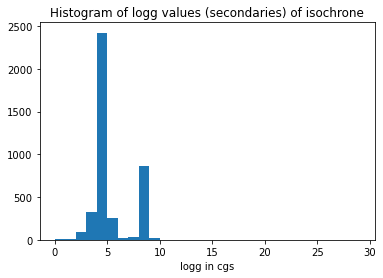

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

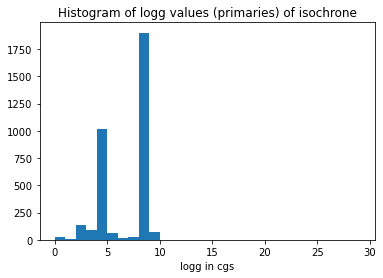

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

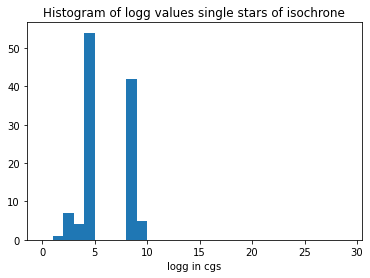

In [17]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Now we examine the phase of the upper lefthand corner of the CMD, which could be full of WR stars.
Note that unlike the IsochronePhot, there are three tables that hold the most important data in the isochrone: singles, primaries, and secondaries attributes.

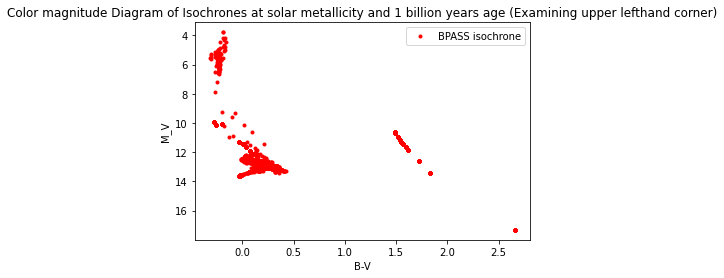

In [18]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg'] > 5)[0]
indices2= np.where(iso1.primaries['logg'] > 5)[0]
indices3= np.where(iso1.secondaries['logg'] > 5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2] - iso1.primaries["m_ubv_V"][indices2],
         iso1.primaries["m_ubv_V"][indices2] - 5 * np.log10(10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3] - iso1.secondaries["m_ubv_V"][indices3],
         iso1.secondaries["m_ubv_V"][indices3] - 5 * np.log10(10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1] - iso1.singles["m_ubv_V"][indices1],
         iso1.singles["m_ubv_V"][indices1] - 5 * np.log10(10), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity" +
          " and 1 billion years age (Examining upper lefthand corner)")
plt.gca().invert_yaxis()
plt.legend()

Examining the potential location of caluse of a vertical line in the upper left hand corner of the plot.

In [19]:
indices2= np.where((iso1.primaries['logg']>5) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>-0.4) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<-0.2))[0]

In [20]:
np.unique(iso1.primaries[indices2]['phase'])

5.0
101.0


The previous kind of shows that there may need to be more work done on identifying when white dwarves are. There should be tons of them in the lower lefthand corner of the CMD. That is an issue I may need to fix.
The following is another look at the CMD of the isochrone, but of only the secondary stars.

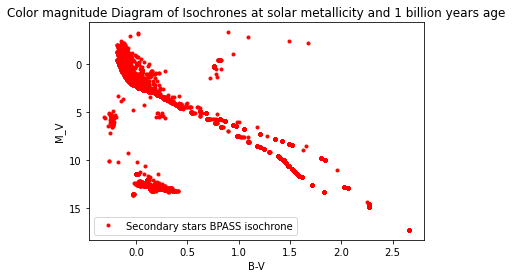

In [21]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"]-5*np.log10(10), "r.", label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [22]:
iso2 = synthetic.IsochronePhot(9.0, 0.0, 100,
                               math.log10(1 / 10), recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 162.425164 s.
Making photometry for isochrone: log(t) = 9.00  AKs = 0.00  dist = 100
     Starting at:  2021-05-24 19:23:20.164251   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.01 seconds
Starting synthetic photometry
M =   0.104 Msun  T =  3384 K  m_ubv_U = 21.55
M =   0.781 Msun  T =  5867 K  m_ubv_U = 11.01
M =   1.713 Msun  T =  9508 K  m_ubv_U = 6.29
M =   1.744 Msun  T =  6165 K  m_ubv_U = 6.22
M =   1.790 Msun  T =  4388 K  m_ubv_U = 5.07
M =   1.903 Msun  T =  5179 K  m_ubv_U = 5.56
M =   1.911 Msun  T =  4438 K  m_ubv_U = 4.91
M =   1.912 Msun  T =  3995 K  m_ubv_U = 5.21
M =   1.912 Msun  T =  3811 K  m_ubv_U = 5.52
M =   1.913 Msun  T =  3716 K  m_ubv_U = 5.79
M =   1.913 Msun  T =  3729 K  m_ubv_U = 5.92
M =   1.913 Msun  T =  4901 K  m_ubv_U = 1.46
M =   1.913 Msun  T = 53895 K  m_ubv_U = 3.26
M =   1.913 Msun  T = 90166 K  m_ubv_U = 10.50
Starting filter: ubv,B   Elapsed time: 8.10 seconds
Starting synthetic photometry
M =  

Looking at the distribution of logg values. for the stars in the MISTv.1 isochrone.

In [23]:
np.max(iso2.points['logg'])

7.941465338001905

(array([505., 146., 198.,  93., 229.,  66.,  24., 123.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

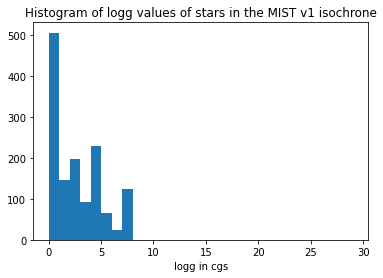

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [25]:
np.median(iso2.points['logg'])

2.1703298385098044

In [26]:
np.mean(iso2.points['logg'])

2.6426943829275906

In [27]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [28]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                    2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 2000, ifmr=ifmr.IFMR_Spera15())

141 single stars had to be deleted
58.46790639616334 solar masses had to be deleted from single stars before application of the IFMR


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Running the changing phase on companions
0 non-single star systems had to be deleted before IFMR application
22 companions had to be deleted before IFMR was applied
Found 46 companions out of stellar mass range


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence.

**Remember to apply the distance modulus. (Dist to cluster=100 pc)**

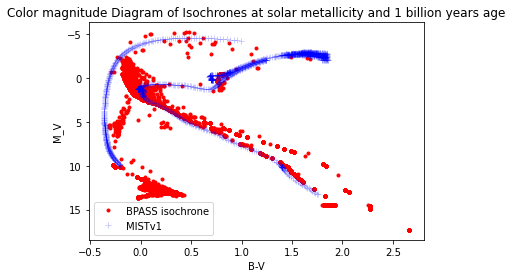

In [29]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100 / 10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100 / 10), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"] -
         5 * np.log10(100 / 10),
         "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"] -
         5 * np.log10(100 / 10), "b+", label="MISTv1", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the MISTv.1 isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

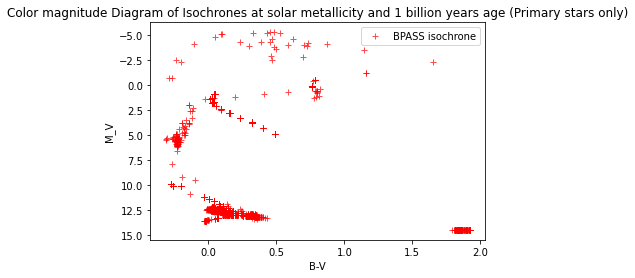

In [30]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"]-5*np.log10(10), "r+",
         label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

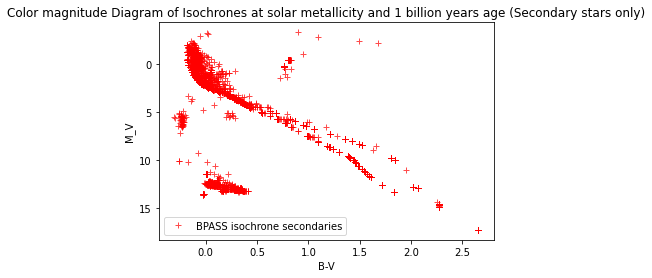

In [31]:
# Color magnitude Diagram of secondary stars in the BPASS isochorne
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(10), "r+", 
         label="BPASS isochrone secondaries", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Secondary stars only)")
plt.gca().invert_yaxis()
plt.legend()

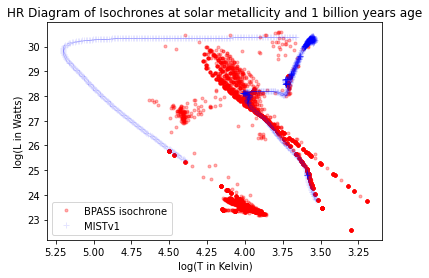

In [32]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']),
         np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']),
         np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']),
         np.log10(iso1.singles["L"]), "r.",
         label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']),
         np.log10(iso2.points["L"]), "b+",
         label="MISTv1", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

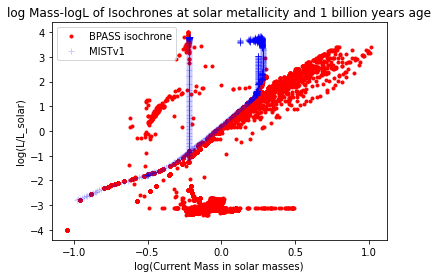

In [33]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']),
         np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']),
         np.log10(iso2.points["L"]/cs.L_sun), "b+", label="MISTv1", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.

Examining the primaries in the isochrone.

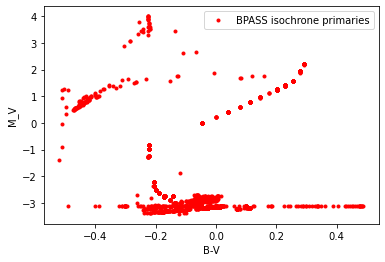

In [34]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.",
         label="BPASS isochrone primaries")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.legend()

Which type of primary star, if any, is it that is causing this strange pattern that is a clump at the bottom of the plot? Let's look at the bad region at around star luminosity = about $10^{-3.2}$ solar luminosities

In [35]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-3.30) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-3.10))[0]]

In [36]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
5.5,2.567390495475608e+23,14062.93599009654,3035171.0013278346,9.27007025201704,False,1.29278,101.0,1,17.689803831109263,18.596694862786006,18.572693901189904,18.57139532164894,18.627723695045358
2.1,2.7273063842204e+23,10466.319786971595,5647655.068217221,8.616863379137843,False,0.99469,101.0,1,17.435749244206384,18.040046292323545,18.171636541596122,17.938736613529947,17.878538235912057
4.0,2.6873048077097104e+23,10324.000098134375,5761713.565581131,8.593080016498233,False,0.9801,101.0,1,17.45027395630483,18.03768418216873,18.177943832198217,17.932107405791697,17.86537052007446
4.0,2.6969005329494576e+23,10357.811425959164,5734369.374539064,8.598758147369812,False,0.9836,101.0,1,17.446701082913084,18.038169796252387,18.176346006031284,17.933618840298525,17.868453857433014
2.7,3.010197072892405e+23,9493.01134730381,7212381.059787064,8.307204690585241,False,0.79515,101.0,1,17.334025747902906,17.811581694145765,18.008207765110463,17.678165858306034,17.568758390774587
1.7,2.3554285190797215e+23,9259.744424238443,6705422.759986897,8.404085124963142,False,0.85906,101.0,1,17.608025896276857,18.050824314087286,18.26527341530864,17.90857010848035,17.785608867781153
4.0,2.1791540318374785e+23,8754.593794447937,7215412.496283447,8.306631092836593,False,0.79477,101.0,1,17.719866557317758,18.08041851747464,18.337020323002548,17.91718992088566,17.762046329052232
5.5,2.5633619243366372e+23,14006.576577103164,3057244.442630553,9.263093761022395,False,1.29075,101.0,1,17.687181465008766,18.590664748321327,18.568419119857108,18.564512762409983,18.619532313031126


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [37]:
np.unique(bad_line['L'])

1.932657645409718e+23
1.933071549832596e+23
1.933730419228513e+23
1.9696766164912036e+23
1.971455275513081e+23
1.971509749588011e+23
1.971868408155623e+23
1.972195343681304e+23
1.9738990094566536e+23
1.9739262800676395e+23
1.9757087766242637e+23


In [38]:
np.unique(bad_line['Teff'])

7779.111564701878
7796.864737380966
7811.294287661608
7814.010671501809
7814.154612223462
7827.913176062374
7841.822359149005
7879.596887948426
7903.746454437324
7906.913723362877
7918.2826461182785


In [39]:
np.unique(bad_line['logg'])

7.961309494515844
7.965267176083383
7.968481691734051
7.969083630818839
7.969116622516238
7.972172177423601
7.9752583240669495
7.983603421937711
7.988921506302239
7.989615875881896
7.992110732749521


In [40]:
np.unique(bad_line['mass'])

1.4
1.6
1.7
1.8
1.9
2.1
2.3
2.7
3.0
3.2
3.5


In [41]:
np.unique(bad_line['phase'])

101.0


**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


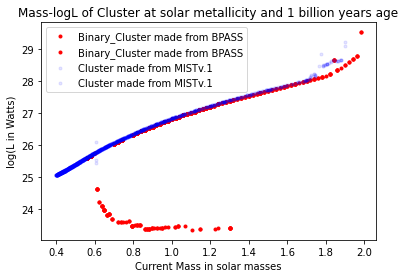

In [42]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.",
         label="Binary_Cluster made from BPASS", alpha =1)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.",
         label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.",
         label="Cluster made from MISTv.1", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.",
         label="Cluster made from MISTv.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Where is that hook coming from?

In [43]:
np.unique(iso1.primaries[np.where(np.log10(iso1.primaries["L"])<=25)]['phase'])

5.0
101.0


In [44]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==110))])

0

In [45]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==101))])

1881

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

Plot the mass-luminosity relationship of the binary_cluster

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


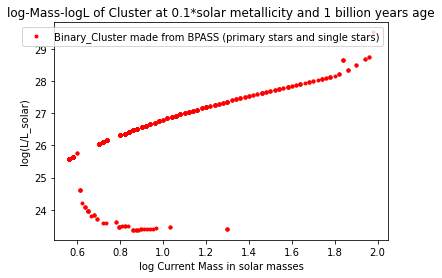

In [46]:
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.",
         label="Binary_Cluster made from BPASS (primary stars and single stars)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1*solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

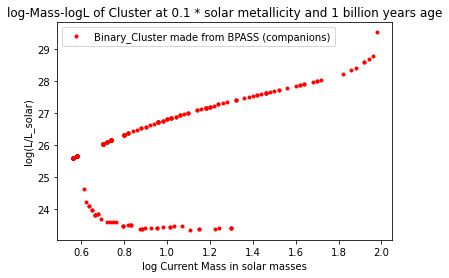

In [47]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.",
         label="Binary_Cluster made from BPASS (companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1 * solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Aha, it looks like the companions are causing this! and these are probably the 110 and 101 phased stars. Otherwise I like the alignment

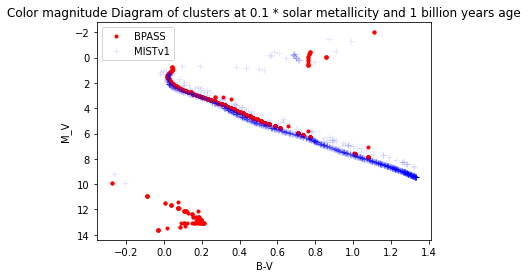

In [48]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(10), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(10), "b+", label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1 * solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


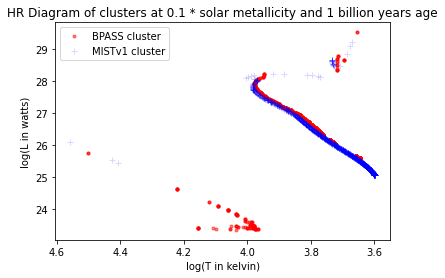

In [49]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]),
         "r.",label="BPASS cluster", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]),
         "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]),
         "r.", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]),
         "b+", label="MISTv1 cluster", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1 * solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [50]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   19,   21,   22,   23,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
         35,   36,   37,   38,   39,   40,   41,   42,   43,   44,   45,
         46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,
         68,   69,   70,   71,   72,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  124,
        125,  126,  127,  128,  130,  131,  132,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  154,  1

Do I see any black holes?

In [51]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

Neutron Stars?

In [52]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Finding the initial masses of the cluster

In [53]:
clus_1.star_systems['systemMass'].sum()

1960.1113844089018

In [54]:
clus_2.star_systems['systemMass'].sum()

1999.8258473946653